#**Dummy variable trap**

The Dummy Variable Trap occurs in regression analysis due to the inclusion of highly correlated dummy variables, which are used to encode categorical data into a numeric format. This situation leads to multicollinearity, where one dummy variable can be perfectly predicted by the others, especially when each category is represented by a separate variable and the categories are mutually exclusive and collectively exhaustive. The primary consequence of the dummy variable trap is multicollinearity, which inflates the standard errors of the coefficient estimates, making them appear statistically insignificant even when they are not. This issue reduces the precision of the estimate coefficients, as small changes in the data or model can lead to large swings in the coefficients, undermining their reliability. Moreover, the presence of multicollinearity complicates the interpretation of the model since the regression coefficients of the dummy variables do not accurately reflect the impact of belonging to certain categories. To avoid the dummy variable trap, we shoould drop one of the dummy variables for a categorical variable, using k-1 dummy variables to represent k categories, which helps in maintaining model accuracy without introducing multicollinearity.

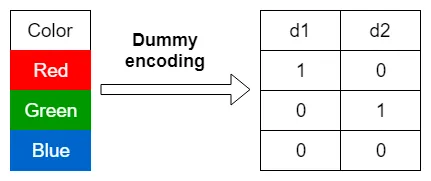

By using the following method, we can overcome the dummy variable trap. Eliminating the redundant category ensures that the newly generated dummy variables are no longer multicollinear with one another.

## Let's examine the popular example of handling the dummy variable trap with linear regression on the 50_Startups.csv dataset.

In this dataset we have 3 US states California, Florida and New York. Before building the linear regression model, 3 US states are assigned with dummy variable. If we use all 3 dummy variable for building regression model, it will lead to multicollinearity or dummy variable trap. So in order to avoid the dummy variable trap, one dummy variable is dropped while builing regression model, which can be validated by checking number of coefficients.
1. D1 for State_California
1. D2 for State_Florida
1. D3 for State_New York




In [33]:
#Import
import numpy as np
import pandas as pd

In [32]:
#Importing dataset from Kaggle
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/abhishek14398/50startups')


Skipping, found downloaded files in "./50startups" (use force=True to force download)


In [34]:
dataset = pd.read_csv('/content/50startups/50_Startups_dataset.csv')

In [35]:
#Importing dataset
#dataset = pd.read_csv('50_Startups.csv')


In [50]:
#First 5 rows of dataset
dataset.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [51]:
dataset.describe()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,192261.930000


In [52]:
#Assinging values to X, Y
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = dataset['Profit']

In [53]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.30,136897.90,471784.20,New York
1,162597.80,151377.69,443898.63,California
2,153441.61,101145.65,407934.64,Florida
3,144372.51,118671.95,383199.72,New York
4,142107.44,91391.87,366168.52,Florida
5,131877.00,99814.81,362861.46,New York
6,134615.56,147198.97,127716.92,California
7,130298.23,145530.16,323876.78,Florida
8,120542.62,148719.05,311613.39,New York
9,123334.98,108679.27,304981.72,California


In [54]:
y

0     192261.93
1     191792.16
2     191050.49
3     182902.09
4     166188.04
5     156991.22
6     156122.61
7     155752.70
8     152211.87
9     149760.06
10    146122.05
11    144259.50
12    141585.62
13    134307.45
14    132602.75
15    129917.14
16    126993.03
17    125370.47
18    124267.00
19    122776.96
20    118474.13
21    111313.12
22    110352.35
23    108734.09
24    108552.14
25    107404.44
26    105733.64
27    105008.41
28    103282.48
29    101004.74
30     99937.69
31     97483.66
32     97427.94
33     96779.02
34     96712.90
35     96479.61
36     90708.29
37     89949.24
38     81229.16
39     81005.86
40     78240.01
41     77798.93
42     71498.59
43     69759.08
44     65200.43
45     64926.18
46     49490.85
47     42559.83
48     35673.51
49     14681.50
Name: Profit, dtype: float64

The 'state' column requires encoding since it's categorical. Creating dummy variables (D1 for California, D2 for Florida, D3 for New York) can cause a trap because if D1 and D2 are 0, D3 is automatically 1, indicating multicollinearity. To prevent this, one dummy variable should be omitted during model building. This is done by X=pd.get_dummies(X, drop_first=True), which excludes the first dummy variable to avoid the trap

In [55]:
X=pd.get_dummies(X, drop_first=True)

In [56]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.30,136897.90,471784.20,0,1
1,162597.80,151377.69,443898.63,0,0
2,153441.61,101145.65,407934.64,1,0
3,144372.51,118671.95,383199.72,0,1
4,142107.44,91391.87,366168.52,1,0
5,131877.00,99814.81,362861.46,0,1
6,134615.56,147198.97,127716.92,0,0
7,130298.23,145530.16,323876.78,1,0
8,120542.62,148719.05,311613.39,0,1
9,123334.98,108679.27,304981.72,0,0


Here ‘drop_first = True’ have dropped dummy variable for State_California.

In [57]:
#Splitting test data into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
#Prediciting Y with Linear regression
y_pred = lr.predict(X_test)

In [60]:
print(y_pred)

[126187.49411512  85788.92259489  99777.1281516   45706.22238325
 127062.30722787  51891.93884402 109114.72977498 100600.71123707
  97954.09874703 111730.67706801 128818.59200667 174195.45772603
  93736.38538393 148381.14097174 172313.97139381]


In [61]:
df=pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
13,126187.494115,134307.45
39,85788.922595,81005.86
30,99777.128152,99937.69
45,45706.222383,64926.18
17,127062.307228,125370.47
48,51891.938844,35673.51
26,109114.729775,105733.64
25,100600.711237,107404.44
32,97954.098747,97427.94
19,111730.677068,122776.96


In [62]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error       :', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R Square                 :', metrics.r2_score(y_test , y_pred))

Mean Absolute Error      : 7395.433531431915
Mean Squared Error       : 84826955.03358725
Root Mean Squared Error  : 9210.154995090325
R Square                 : 0.9397108063368201


# Conclusion
The dataset aimed at predicting profit spans three US states: California, Florida, and New York. In the process of preparing for linear regression model construction, each state is represented by a dummy variable. Utilizing all three dummy variables in the regression model could result in multicollinearity or a dummy variable trap. To circumvent this issue, one dummy variable is excluded when building the regression model. The effectiveness of this approach can be confirmed by examining the number of coefficients.

# References

1. https://www.statology.org/dummy-variable-trap/
2. https://www.learndatasci.com/glossary/dummy-variable-trap/
3. https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/
4. https://www.linkedin.com/pulse/dummy-variable-trap-how-reduce-redundancies-reday-zarra/
5. https://medium.com/data-science-365/what-is-the-dummy-variable-trap-and-how-to-avoid-it-aeb227c2cd92 (Picture source)
5. https://medium.com/nerd-for-tech/what-is-dummy-variable-trap-how-it-can-be-handled-using-python-78ec17246331 (Code insparation)